# Supervised Learning

## k-NN

In [9]:
from numpy import *
import operator

def createDataSet():
    group=array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels=['A','A','B','B'] # labels
    return group, labels
createDataSet()

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]), ['A', 'A', 'B', 'B'])

In [10]:
group,labels=createDataSet()

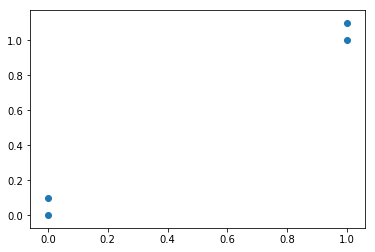

In [11]:
%matplotlib inline
from numpy import array
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(group[:,0],group[:,1])
plt.show()

In [16]:
def classify0(inX, dataSet, labels, k):
    dataSetSize=dataSet.shape[0]
    diffMat=tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances=sqDiffMat.sum(axis=1)
    distances=sqDistances**0.5
    sortedDistIndices=distances.argsort()
    classCount={}
    
    for i in range(k):
        votellabel=labels[sortedDistIndices[i]]
        classCount[votellabel]=classCount.get(votellabel,0)+1
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]


In [17]:
classify0([0,0],group,labels,3)

'B'

### 예제: kNN을 이용하여 데이터 사이트의 만남 주선 개선하기

In [27]:
def file2matrix(filename):
    love_dictionary={'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr=open(filename)
    arrayOLines=fr.readlines()
    numberOfLines=len(arrayOLines)
    returnMat=zeros((numberOfLines,3))
    classLabelVector=[]
    index=0
    for line in arrayOLines:
        line=line.strip() # 공백 없애줌
        listFromLine = line.split('\t') # tab 기준으로 분리되어있다고 말해줌
        returnMat[index,:] = listFromLine[0:3]
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index+=1
    return returnMat, classLabelVector
        

In [30]:
datingDataMat, datingLabels = file2matrix('datingTestSet.txt')

In [31]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [32]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

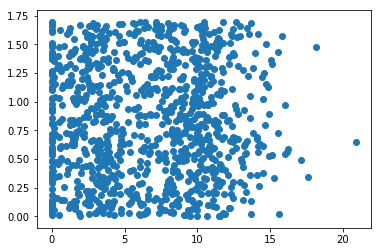

In [42]:
from numpy import array
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2])

plt.show()

In [45]:
def autoNorm(dataSet):
    minVals=dataSet.min(0)
    maxVals=dataSet.max(0)
    ranges=maxVals-minVals
    normDataSset = zeros(shape(dataSet))
    m=dataSet.shape[0]
    normDataSet = dataSet - tile(minVals,(m,1))
    normDataSet = normDataSet/tile(ranges,(m,1))
    return normDataSet, ranges, minVals

In [46]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [47]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [48]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [49]:
minVals

array([0.      , 0.      , 0.001156])

In [57]:
def datingClassTest():
    hoRatio  = 0.10 # hold out %10
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVal = autoNorm(datingDataMat) # 정규화
    m = normMat.shape[0] # row 개수
    numTestVecs=int(m*hoRatio) # test vector 개수
    errorCount=0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m],3)
        print("the classifier came back with: {}, the real answer is :{}" .format(classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount+=1.0
    print("the total error rate is:{}" .format(errorCount/float(numTestVecs)))
    print("the error count: {}" .format(errorCount))

In [59]:
datingClassTest()

the classifier came back with: 3, the real answer is :3
the classifier came back with: 2, the real answer is :2
the classifier came back with: 1, the real answer is :1
the classifier came back with: 1, the real answer is :1
the classifier came back with: 1, the real answer is :1
the classifier came back with: 1, the real answer is :1
the classifier came back with: 3, the real answer is :3
the classifier came back with: 3, the real answer is :3
the classifier came back with: 1, the real answer is :1
the classifier came back with: 3, the real answer is :3
the classifier came back with: 1, the real answer is :1
the classifier came back with: 1, the real answer is :1
the classifier came back with: 2, the real answer is :2
the classifier came back with: 1, the real answer is :1
the classifier came back with: 1, the real answer is :1
the classifier came back with: 1, the real answer is :1
the classifier came back with: 1, the real answer is :1
the classifier came back with: 1, the real answe

In [66]:
def classifyPerson():
    resultList=['not at all', 'in small doses', 'in large doses']
    percentTats=float(input("percentage of time spent playing video games?"))
    ffMiles=float(input("frequent flier miles earned per year?"))
    iceCream=float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr= array([ffMiles, percentTats, iceCream, ])
    classifierResult=classify0((inArr-minVals)/ranges, normMat, datingLabels, 3)
    print(classifierResult)
    print("You will probably like this person: {}" .format(resultList[classifierResult -1]))

In [67]:
classifyPerson()

percentage of time spent playing video games?33
frequent flier miles earned per year?1111
liters of ice cream consumed per year?111
3
You will probably like this person: in large doses


## Decision Tree

In [68]:
from math import log
import operator

def createDataSet():
    dataSet = [[1,1,'yes'],
              [1,1,'yes'],
              [1,0,'no'],
              [0,1,'no'],
              [0,1,'no'],]
    labels=['no surfacing', 'flippers']
    return dataSet, labels

In [84]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts={}
    for featVec in dataSet:
        currentLabel=featVec[-1]
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel]=0
        labelCounts[currentLabel] +=1
    shannonEnt = 0.0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries
        shannonEnt-=prob*log(prob,2)
    return shannonEnt

In [85]:
myDat, labels = createDataSet()

In [86]:
calcShannonEnt(myDat)

0.9709505944546686

In [88]:
myDat[0][-1]='maybe'

In [91]:
def splitDataSet(dataSet, axis, value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [92]:
splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

In [93]:
splitDataSet(myDat,0,1)

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [94]:
splitDataSet(myDat,1,0)

[[1, 'no']]

In [95]:
splitDataSet(myDat,1,1)

[[1, 'maybe'], [1, 'yes'], [0, 'no'], [0, 'no']]

In [100]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0])-1
    baseEntrophy = calcShannonEnt(dataSet)
    bestInfoGain=0.0; bestFeature=-1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntrophy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntrophy += prob*calcShannonEnt(subDataSet)
        infoGain = baseEntrophy - newEntrophy
        if (infoGain>bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [101]:
chooseBestFeatureToSplit(myDat)

0

In [102]:
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] +=1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [103]:
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataSet[0]) ==1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTreef

In [104]:
def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0:'no', 1:{'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0:'no', 1:{'flippers': {0:{'head': {0: 'no', 1:'yes'}}, 1:'no'}}}}
                  ]
    return listOfTrees[i]

In [105]:
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree)[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else: classLabel = valueOfFeat
    return classLabel

In [107]:
myTree = retrieveTree(0)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [108]:
classify(myTree, labels, [1,0])

'no'

In [109]:
classify(myTree, labels, [1,1])

'yes'

### 자습 해보기

In [123]:
dataSet = [[1,1,'yes'],
            [1,1,'yes'],
            [1,0,'no'],
            [0,1,'no'],
            [0,1,'no'],]
axis=0
value=0

retDataSet=[]
for featVec in dataSet:
#featVec=dataSet[0,:]
    if featVec[axis]==value:
        reducedFeatVec=featVec[:axis]
        print(reducedFeatVec)
        reducedFeatVec.extend(featVec[axis+1:])
        print(reducedFeatVec)
        retDataSet.append(reducedFeatVec)
        

[]
[1, 'no']
[]
[1, 'no']


In [132]:
a=arange(5)
print(a)
print(a[:1])
print(a[2:])

[0 1 2 3 4]
[0]
[2 3 4]


## Linear Regression

In [138]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성
np.random.seed(seed=1) # 난수를 고정
X_min=4 # x의 하한 (표시용)
X_max=30 # x의 상한 (표시용)
X_n=16 # x의 개수
X = 5+25*np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2]*X) + 4*np.random.randn(X_n) # (A)

print(np.round(X,2))
print(np.round(T,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


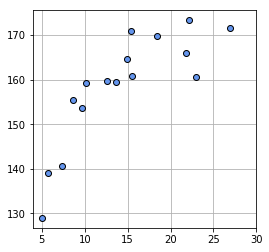

In [139]:
plt.figure(figsize=(4,4))
plt.plot(X,T,marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

### Mean Square Error

In [140]:
from mpl_toolkits.mplot3d import Axes3D
# 평균 오차 함수---
def mse_line(x,t,w):
    y=w[0]*x+w[1]
    mse=np.mean((y-t)**2)
    return mse

In [141]:
# 계산
xn=100 # 등고선 표시 해상도
w0_range=[-25,25]
w1_range=[120,170]
x0=np.linspace(w0_range[0], w0_range[1],xn)
x1=np.linspace(w1_range[0], w1_range[1],xn)
xx0,xx1=np.meshgrid(x0,x1)
J=np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0] = mse_line(X,T,(x0[i0], x1[i1]))

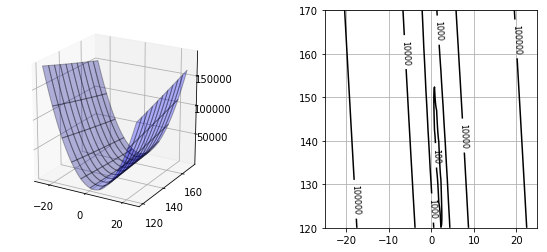

In [143]:
# 표시
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.5)

ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,J,rstride=10,cstride=10,alpha=0.3,color='blue',edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont=plt.contour(xx0,xx1,J,30,colors='black',levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()

### Gradient descent

In [144]:
# 평균 제곱 오차의 기울기--------
def dmse_line(x,t,w):
    y=w[0]*x+w[1]
    d_w0 = 2*np.mean((y-t)*x)
    d_w1 = 2*np.mean(y-t)
    return d_w0, d_w1

d_w=dmse_line(X,T,[10,165])
print(np.round(d_w,1))

[5046.3  301.8]


In [145]:
# 경사 하강법------
def fit_line_num(x,t):
    w_init=[10.0, 165.0] # 초기 매개 변수
    alpha = 0.001 # 학습률
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 # 반복을 종료 기울기의 절대값의 한계
    w_i = np.zeros([i_max,2])
    w_i[0,:]=w_init
    for i in range(1,i_max):
        dmse = dmse_line(x,t,w_i[i-1])
        w_i[i,0] = w_i[i-1,0]-alpha*dmse[0]
        w_i[i,1] = w_i[i-1,1]-alpha*dmse[1]
        if max(np.absolute(dmse)) < eps: # 종료판정, np.absolute는 절대값
            break
    w0 = w_i[i,0]
    w1 = w_i[i,1]
    w_i=w_i[:i,:]
    return w0, w1, dmse, w_i

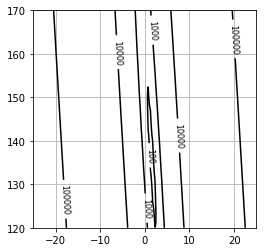

In [146]:
# 메인--------------
plt.figure(figsize=(4,4)) # MSE의 등고선 표시
xn=100 # 등고선 해상도
w0_range = [-25,25]
w1_range = [120,170]
x0=np.linspace(w0_range[0], w0_range[1],xn)
x1=np.linspace(w1_range[0], w1_range[1],xn)
xx0,xx1=np.meshgrid(x0,x1)
J=np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0] = mse_line(X,T,(x0[i0],x1[i1]))
cont = plt.contour(xx0,xx1,J,30,colors='black', levels=(100,1000,10000,100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=-0.005794
MSE=49.027452


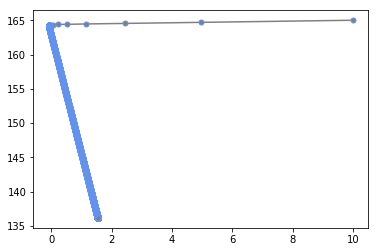

In [147]:
# 경사 하강법 호출
W0, W1, dMSE, W_history = fit_line_num(X,T)
# 결과 보기
print('반복 횟수 {0}' .format(W_history.shape[0]))
print('W=[{0:.6f}, {1:6f}]'.format(W0,W1))
print('dMSE={0:.6f}'.format(dMSE[0],dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X,T,[W0,W1])))
plt.plot(W_history[:,0], W_history[:,1],'.-', color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()

w0=1.540, w1=136.176
SD=7.002 cm


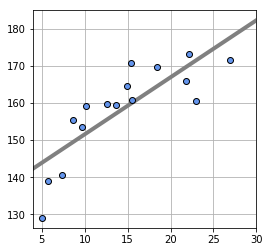

In [148]:
# 선 표시--------------------------
def show_line(w):
    xb=np.linspace(X_min,X_max,100)
    y=w[0]*xb+w[1]
    plt.plot(xb,y,color=(.5,.5,.5),linewidth=4)
    
# 메인-----------------------------
plt.figure(figsize=(4,4))
W=np.array([W0,W1])
mse=mse_line(X,T,W)
print("w0={0:.3f}, w1={1:.3f}".format(W0,W1))
print("SD={0:.3f} cm" .format(np.sqrt(mse)))
show_line(W)
plt.plot(X,T,marker='o',linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

